This Notebook creates some plots of my_databse, to show for example when data is avaible.



In [1]:
# The idea is to restructure my current notebooks, to divide import and analysis plots

# für abkühlung des wassertanks eiswürfel kaufen 10 kg oder so und in tank rein. Am besten irgendwie an Boden in Box fixieren, damit es irgendwie gleichmäßig abkühlt und nicht eiswürfel direkt am kabel liegen

# differenz zwischen Channeln berechnen und gucken ob sie konstant ist

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Daten mit T-Logger vergleichen

In [3]:
%%time
# Wall time: 1min 56s
# Load data
path_to_my_database = r"..\Alsdorf\Daten\my_database"
def import_my_database(year,path_to_my_database):
    """ import the data of my_databse, every year seperate"""

    def importer(data_20xx, path_to_my_database, year, c):
        """just for shortening the code"""
        
        filename = f"temp_ch{c}_{year}.csv"
        path_to_file[filename] = path_to_my_database + "\\" + filename

        data_20xx[str(c)] = pd.read_csv(path_to_file[f"temp_ch{c}_{year}.csv"], index_col=0)
        data_20xx[str(c)].index = pd.to_datetime(data_20xx[str(c)].index, infer_datetime_format=True)

        return data_20xx

    path_to_file={}
    data_20xx = {}
    if year == 2021: # all channels are activated since 01.06.2021
        channels = [1,2,3,4,5,6,7,8]
        for c in channels:
            importer(data_20xx, path_to_my_database, year, c)

    if year == 2019 or 2020: # channels 5-8 are empty
        channels = [1,2,3,4]
        for c in channels:
            importer(data_20xx, path_to_my_database, year, c)

    return data_20xx

data_2019 = import_my_database(2019, path_to_my_database)
data_2020 = import_my_database(2020, path_to_my_database)
data_2021 = import_my_database(2021, path_to_my_database)


Wall time: 1min 59s


In [4]:
%%time
#
# Merge the different year dics into one
def merge_data_year(list_data_years):
    """input the different year dics as a list"""
    data = {}

    for data_20xx in list_data_years:
        for channel in data_20xx.keys():

            if channel in data.keys():
                data[channel] = pd.concat([data[channel], data_20xx[channel]], axis = 0)

            else: # channel not in data dic
                data[channel] = data_20xx[channel]

    #eventle noch sort index machen !!!!!!!!!!!!!!!!!!!!!!!!!
    return data

data_all = merge_data_year([data_2019, data_2020, data_2021])

Wall time: 17.8 s


In [5]:
# Load data T-logger
path_to_data_Tlogger = r"..\Alsdorf\Daten\T-logger"
filename_Tlogger = "08062021\_adc_START_07.06.2021-12_11_40_daten.txt"

df_Tlogger = pd.read_csv(path_to_data_Tlogger + "\\" + filename_Tlogger, sep=";", usecols=[1,2,3,4], names=["Date","Time","Channel1-Watertank","Channel2-Air"])
DateTime=df_Tlogger["Date"] + " " + df_Tlogger["Time"]
df_Tlogger.index =pd.to_datetime(DateTime, format=("%d.%m.%y  %H:%M:%S"))
df_Tlogger.index.names = ['Date']
df_Tlogger = df_Tlogger.drop(df_Tlogger.columns[0:2],axis=1) # drop the two columns which are now used for index
df_Tlogger

Channel1-Watertank  Channel2-Air
Date                                                 
2021-06-07 12:12:40           24.948476     25.819904
2021-06-07 12:13:40           25.026853     25.443956
2021-06-07 12:14:40           24.888809     25.165027
2021-06-07 12:15:40           25.011371     24.926351
2021-06-07 12:16:40           25.014596     24.753213
...                                 ...           ...
2021-06-08 13:14:13           25.372612     24.471704
2021-06-08 13:15:13           25.381965     24.492347
2021-06-08 13:16:13           25.385190     24.499055
2021-06-08 13:17:13           25.360033     24.510408
2021-06-08 13:18:13           25.369386     24.518150

[1506 rows x 2 columns]

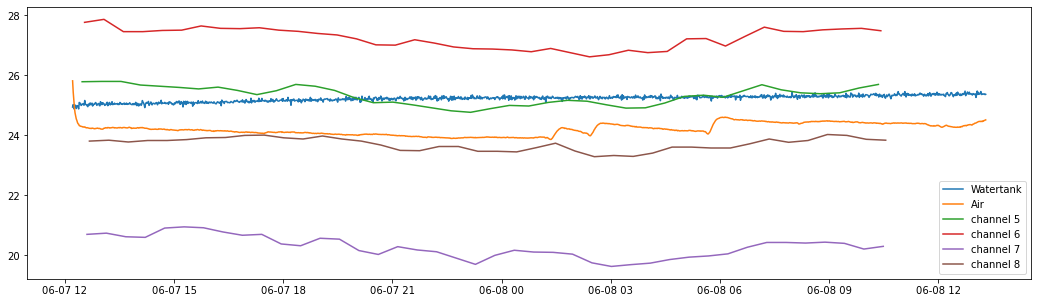

In [119]:
watertank_EGRT = "19"
watertank = "69"



plt.figure(figsize=(18,5))
position_watertank=15
plt.plot(df_Tlogger.index, df_Tlogger["Channel1-Watertank"], label="Watertank")
plt.plot(df_Tlogger.index, df_Tlogger["Channel2-Air"], label="Air")
for c in ["5","6","7","8"]:
    inde=data_2021[c][str(df_Tlogger.index.min()) : str(df_Tlogger.index.max())][watertank_EGRT].index
    val=data_2021[c][str(df_Tlogger.index.min()) : str(df_Tlogger.index.max())][watertank_EGRT].values
    plt.plot(inde,val, label=f"channel {c}")



plt.legend()
#Wassertank am 07.06. aufgefüllt, mit kälteren Wasser

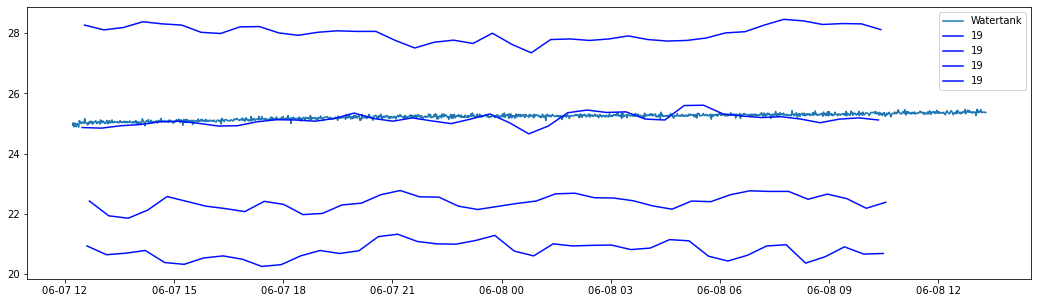

In [118]:
#andere Seite 
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)
col=get_cmap(7)

watertank_EGRT = 19 #unter 20 sind die Temp relativ konstant

#col=["black","green","blue","yellow"]

plt.figure(figsize=(18,5))
position_watertank=15
plt.plot(df_Tlogger.index, df_Tlogger["Channel1-Watertank"], label="Watertank")
#plt.plot(df_Tlogger.index, df_Tlogger["Channel2-Air"], label="Air")
for c in ["5","6","7","8"]:
    for watertank_EGRT in [19]:
        val=int(data_2021[c].columns[-1]) - watertank_EGRT
        watertank_EGRT_back=str(val)
        inde=data_2021[c][str(df_Tlogger.index.min()) : str(df_Tlogger.index.max())][watertank_EGRT_back].index
        val=data_2021[c][str(df_Tlogger.index.min()) : str(df_Tlogger.index.max())][watertank_EGRT_back].values

        #plt.plot(inde,val, label=f"channel {c}", color=col[int(c)-5]) # color channels
        plt.plot(inde,val, label=f"{watertank_EGRT}", color=col(int(watertank_EGRT)-15)) # color watertank_EGRT


plt.legend()
#Wassertank am 07.06. aufgefüllt, mit kälteren Wasser

In [22]:
col


1708

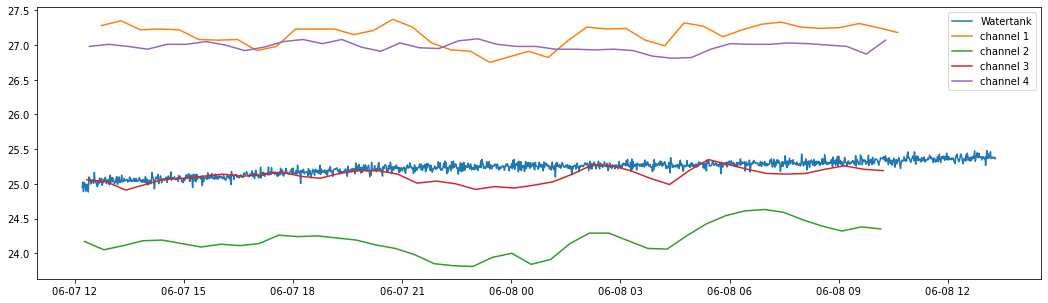

In [7]:

watertank = "69"



plt.figure(figsize=(18,5))
position_watertank=15
plt.plot(df_Tlogger.index, df_Tlogger["Channel1-Watertank"], label="Watertank")
#plt.plot(df_Tlogger.index, df_Tlogger["Channel2-Air"], label="Air")
for c in ["1","2","3","4"]:
    inde=data_2021[c][str(df_Tlogger.index.min()) : str(df_Tlogger.index.max())][watertank].index
    val=data_2021[c][str(df_Tlogger.index.min()) : str(df_Tlogger.index.max())][watertank].values
    plt.plot(inde,val, label=f"channel {c}")
plt.legend()

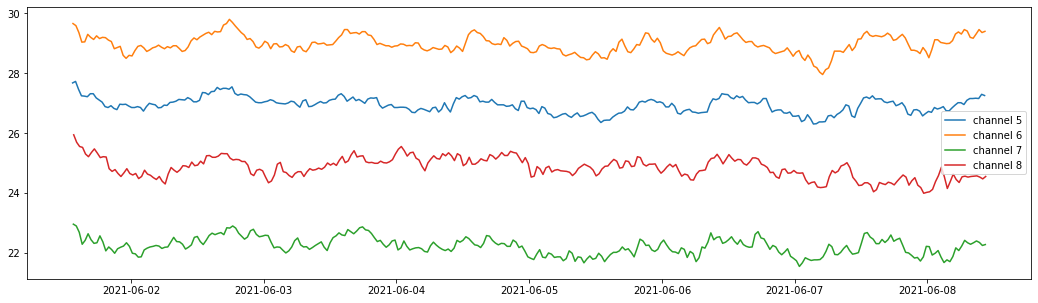

In [8]:
plt.figure(figsize=(18,5))
length="10"
#plt.plot(df_Tlogger.index, df_Tlogger["Channel1-Watertank"], label="Watertank")
#plt.plot(df_Tlogger.index, df_Tlogger["Channel2-Air"], label="Air")
for c in ["5","6","7","8"]:
    inde=data_2021[c][:][length].index
    val=data_2021[c][:][length].values
    plt.plot(inde,val, label=f"channel {c}")

plt.legend()

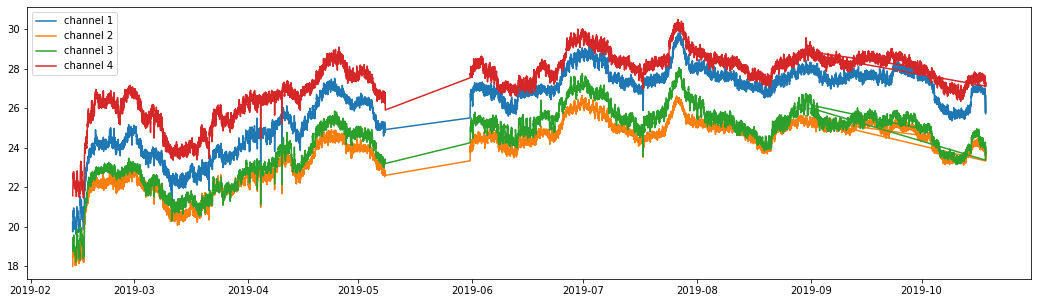

In [9]:
#plot data 2019
plt.figure(figsize=(18,5))
length="69"
#plt.plot(df_Tlogger.index, df_Tlogger["Channel1-Watertank"], label="Watertank")
#plt.plot(df_Tlogger.index, df_Tlogger["Channel2-Air"], label="Air")
for c in ["1","2","3","4"]:
    inde=data_2019[c][:][length].index
    val=data_2019[c][:][length].values
    plt.plot(inde,val, label=f"channel {c}")

plt.legend()

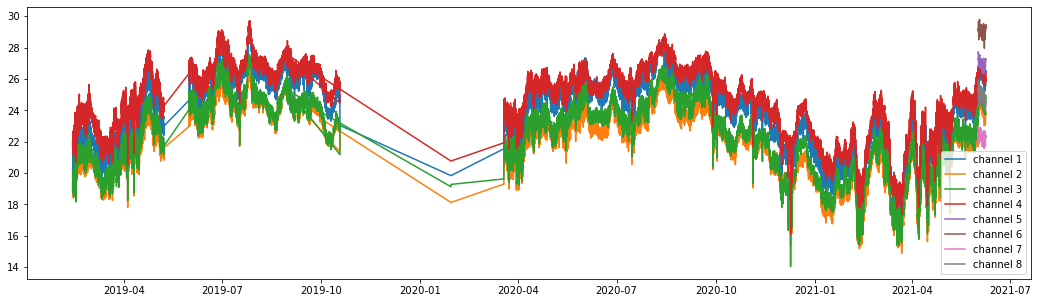

In [70]:
# Plot all data, very close to controller --> should all have same temp
plt.figure(figsize=(18,5))
length="10"
#plt.plot(df_Tlogger.index, df_Tlogger["Channel1-Watertank"], label="Watertank")
#plt.plot(df_Tlogger.index, df_Tlogger["Channel2-Air"], label="Air")
for c in ["1","2","3","4","5","6","7","8"]:
    inde=data_all[c][length].index
    val=data_all[c][length].values
    plt.plot(inde,val, label=f"channel {c}")

plt.legend()

In [132]:
# quick correction for waterteank temp difference

df_Tlogger["Channel1-Watertank"].index[-850]
val_watertank=df_Tlogger["Channel1-Watertank"]['2021-06-07 23:08:47']

date=-20 #from last measurements
watertank_len=19
val_watertank_ch={}
diff_in_watertank={}
for chan in ["5","6","7","8"]:
    date_name=data_all[chan].iloc[date].name
    val_watertank_ch[chan]=data_all[chan].iloc[date][watertank_len]
    diff_in_watertank[chan]=val_watertank_ch[chan] - val_watertank

(5.0, 40.0)

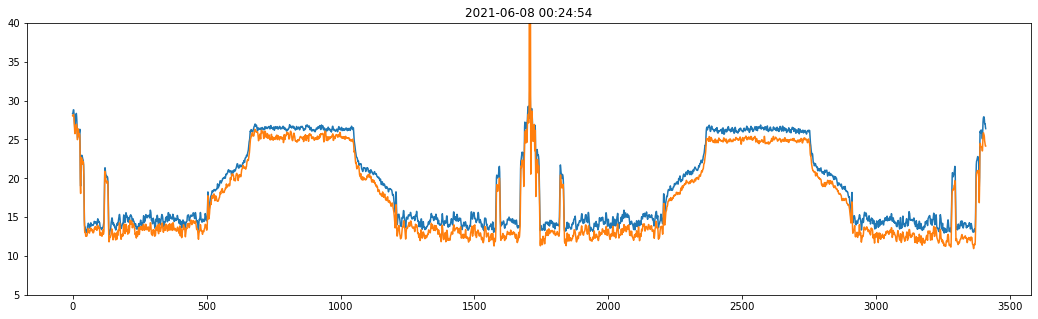

In [191]:
channel=["1","2","3","4","5","6","7","8"]
channel=["1","2","3","4"]
channel=["5","6","7","8"]
#channel=["5","6"]
channel=["7","8"]
date=-20 #from last measurements


corrected_val={}
plt.figure(figsize=(18,5))
#plt.vline
for chan in channel:
    length=data_all[chan].iloc[date].index
    x=np.array(length).astype(int)#[:int(int(length[-1])/2)] #use this if plot half the cable; channel 7,8
    corrected_val[chan]=np.array(data_all[chan].iloc[date].values) - diff_in_watertank[chan]
    date_name=data_all[chan].iloc[date].name

    y=corrected_val[chan]#[:int(int(length[-1])/2)] #use this if plot half the cable; channel 7,8
    plt.plot(x,y,label=f"channel {chan}")
    plt.title(data_all[chan].iloc[date].name)
plt.ylim(5,40)

In [171]:
############To DO#######################
#alle stellen markieren die durch wassertank gehen, wo genau sind diese?
#       variable machen, sodass ich position wassertank anpassen kann
# 
# 
# Position Spleiß Kasten markieren
#   Ist großer peak in mitte von splice kasten bei channel 7 8? 
#   Denke Ja
#   dort dann auch nach Wassertank gucken, welcher peak es ist
# 
# 
#  
# was ist der peak bei ca. 120 m?


0.00020403760243288053,    0.9974897814294611


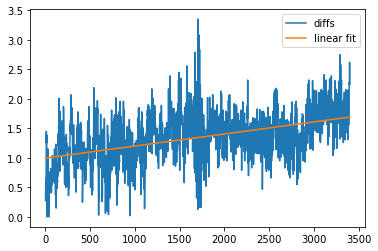

In [170]:
# diff steigt mit länge des Kabels
diff=np.abs(corrected_val["7"] - corrected_val["8"])
diff_clean=np.delete(diff,np.where(diff > 6)) #remove outliers
leng=len(diff_clean)
x=np.arange(0,leng)

plt.plot(x,diff_clean,label="diffs")
a,b=np.polyfit(x,diff_clean,deg=1)

plt.plot(x,b+a*x,label="linear fit")
plt.legend()
print(f"{a},    {b}")

In [187]:
x[:10.0]

TypeError: slice indices must be integers or None or have an __index__ method

In [186]:
int(length[-1])/2

1704.0